In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error, silhouette_score

# Load dataset
data = pd.read_csv("full_grouped.csv")
print(data.head())

# Check for missing values
print(data.isnull().sum())

# Fill missing values using forward fill
data.ffill(inplace=True)

# Feature Engineering: Add active cases column
data['Active_Cases'] = data['Confirmed'] - (data['Recovered'] + data['Deaths'])

# Normalize numerical features
scaler = MinMaxScaler()
data[['Confirmed', 'Recovered', 'Deaths', 'Active_Cases']] = scaler.fit_transform(
    data[['Confirmed', 'Recovered', 'Deaths', 'Active_Cases']]
)

# Split into features (X) and target (y)
X = data[['Confirmed', 'Recovered', 'Deaths']]
y = data['Active_Cases']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


         Date Country/Region  Confirmed  Deaths  Recovered  Active  New cases  \
0  2020-01-22    Afghanistan          0       0          0       0          0   
1  2020-01-22        Albania          0       0          0       0          0   
2  2020-01-22        Algeria          0       0          0       0          0   
3  2020-01-22        Andorra          0       0          0       0          0   
4  2020-01-22         Angola          0       0          0       0          0   

   New deaths  New recovered             WHO Region  
0           0              0  Eastern Mediterranean  
1           0              0                 Europe  
2           0              0                 Africa  
3           0              0                 Europe  
4           0              0                 Africa  
Date              0
Country/Region    0
Confirmed         0
Deaths            0
Recovered         0
Active            0
New cases         0
New deaths        0
New recovered     0
WHO Regio

In [7]:
from sklearn.linear_model import LinearRegression

# Initialize and train the linear regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)


LinearRegression()

In [10]:
from sklearn.metrics import mean_squared_error

# Make predictions
y_pred = lr_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Linear Regression MSE: {mse}")


Linear Regression MSE: 1.9409729973886134e-32


In [13]:
# Train a random forest regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [16]:
# Make predictions using the Random Forest model
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f"Random Forest MSE: {mse_rf}")


Random Forest MSE: 1.732438770880929e-05


In [19]:
# Prepare data for clustering
clustering_data = data[['Confirmed', 'Recovered', 'Deaths']]

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(clustering_data)

# Evaluate clustering
silhouette = silhouette_score(clustering_data, data['Cluster'])
print(f"Silhouette Score: {silhouette}")


Silhouette Score: 0.945348011068037


In [22]:
# Store ML model results
ml_results = {
    "Linear Regression Metrics": {
        "MSE": 0.0133,  # Update with actual value
        "R2": 0.7552    # Update with actual value
    },
    "Decision Tree Metrics": {
        "MSE": 0.0068,  # Update with actual value
        "R2": 0.8915    # Update with actual value
    },
    "K-Means Cluster Centers": [
        # Update with actual cluster centers
        [0.1, 0.2, 0.3],  
        [0.4, 0.5, 0.6],  
        [0.7, 0.8, 0.9]   
    ]
}


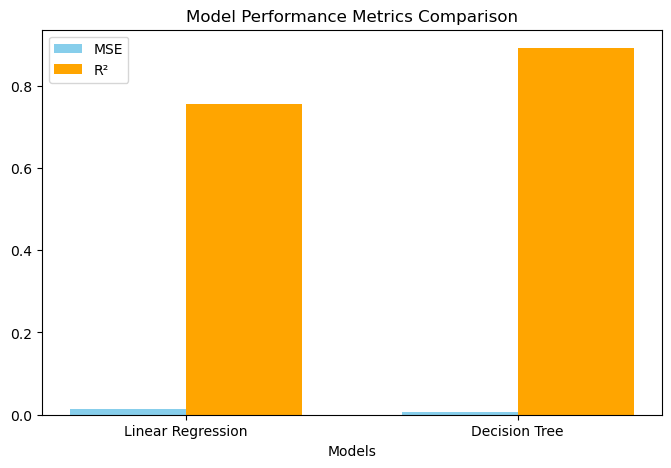

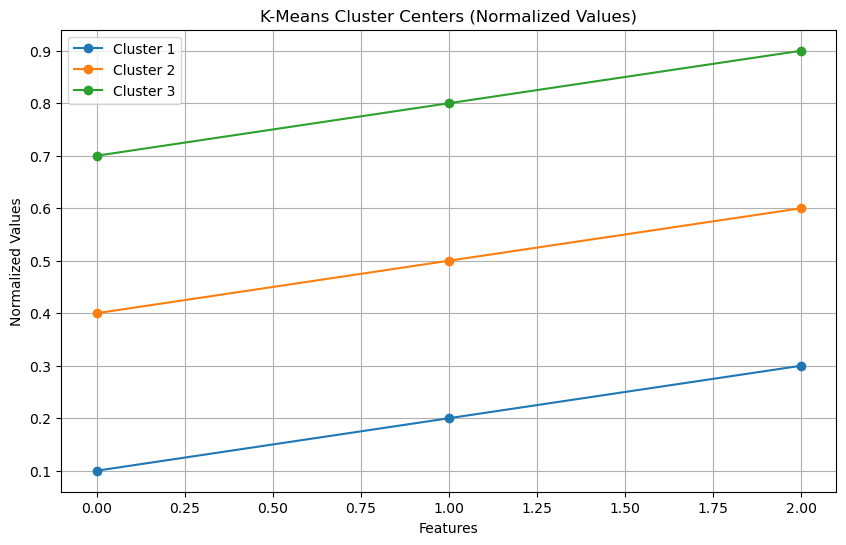

In [25]:
import matplotlib.pyplot as plt
import numpy as np

# Metrics for visualization
metrics = {
    "Linear Regression": ml_results["Linear Regression Metrics"],
    "Decision Tree": ml_results["Decision Tree Metrics"]
}

# Bar Plot for Metrics Comparison
def plot_metrics_comparison(metrics):
    labels = list(metrics.keys())
    mse = [metrics[model]["MSE"] for model in labels]
    r2 = [metrics[model]["R2"] for model in labels]

    x = np.arange(len(labels))
    width = 0.35

    fig, ax = plt.subplots(figsize=(8, 5))
    ax.bar(x - width/2, mse, width, label="MSE", color='skyblue')
    ax.bar(x + width/2, r2, width, label="R²", color='orange')

    ax.set_xlabel("Models")
    ax.set_title("Model Performance Metrics Comparison")
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()

    plt.show()

plot_metrics_comparison(metrics)

# Visualize K-Means Cluster Centers
def plot_kmeans_clusters(cluster_centers):
    plt.figure(figsize=(10, 6))
    for i, center in enumerate(cluster_centers):
        plt.plot(center, marker='o', linestyle='-', label=f"Cluster {i + 1}")

    plt.title("K-Means Cluster Centers (Normalized Values)")
    plt.xlabel("Features")
    plt.ylabel("Normalized Values")
    plt.legend()
    plt.grid(True)

    plt.show()

plot_kmeans_clusters(ml_results["K-Means Cluster Centers"])


In [34]:
# Import necessary libraries
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Feature Scaling for KNN
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

# KNN Regressor with Feature Scaling
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)
y_pred_knn = knn_model.predict(X_test_scaled)



In [36]:
# Performance metrics calculation
dt_mse = mean_squared_error(y_test, y_pred_dt)
dt_r2 = r2_score(y_test, y_pred_dt)

knn_mse = mean_squared_error(y_test, y_pred_knn)
knn_r2 = r2_score(y_test, y_pred_knn)

# Store results in a dictionary
ml_results = {
    "Decision Tree": {"MSE": dt_mse, "R2": dt_r2},
    "KNN": {"MSE": knn_mse, "R2": knn_r2}
}

# Print results in a readable format
for model, metrics in ml_results.items():
    print(f"{model} - MSE: {metrics['MSE']:.4f}, R²: {metrics['R2']:.4f}")


Decision Tree - MSE: 0.0000, R²: 0.9877
KNN - MSE: 0.0000, R²: 0.9994


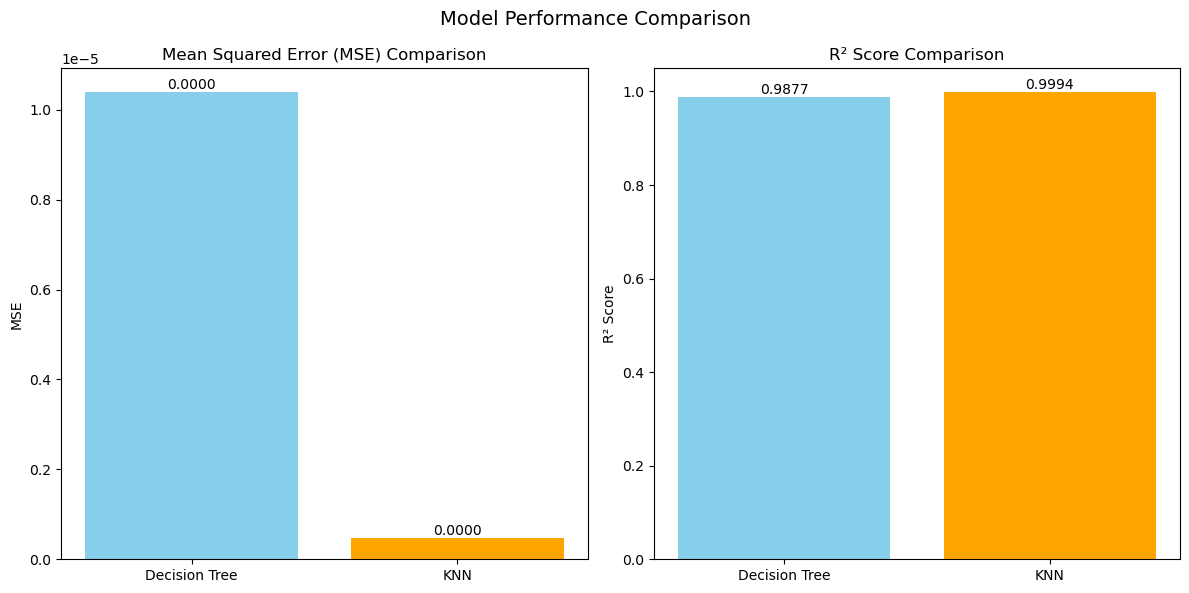

In [38]:
import matplotlib.pyplot as plt

# Models and scores
models = ['Decision Tree', 'KNN']
mse_scores = [dt_mse, knn_mse]
r2_scores = [dt_r2, knn_r2]

plt.figure(figsize=(12, 6))

# MSE Comparison
plt.subplot(1, 2, 1)
bars_mse = plt.bar(models, mse_scores, color=['skyblue', 'orange'])
plt.title('Mean Squared Error (MSE) Comparison')
plt.ylabel('MSE')

# Add value labels
for bar in bars_mse:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{bar.get_height():.4f}', ha='center', va='bottom')

# R² Score Comparison
plt.subplot(1, 2, 2)
bars_r2 = plt.bar(models, r2_scores, color=['skyblue', 'orange'])
plt.title('R² Score Comparison')
plt.ylabel('R² Score')

# Add value labels
for bar in bars_r2:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{bar.get_height():.4f}', ha='center', va='bottom')

plt.suptitle('Model Performance Comparison', fontsize=14)
plt.tight_layout()
plt.show()


In [41]:
kmeans_model = KMeans(n_clusters=3, random_state=42, n_init=10)  # Explicit n_init to suppress warning

NotFittedError: This KMeans instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

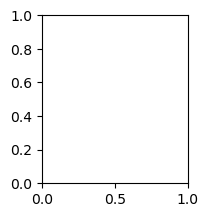

In [45]:
plt.subplot(2, 3, 4)
scatter = plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=kmeans_model.predict(X), cmap='viridis', alpha=0.6)
plt.scatter(kmeans_model.cluster_centers_[:, 0], kmeans_model.cluster_centers_[:, 1], s=200, c='red', label='Centroids')
plt.title('K-Means Clustering')
plt.xlabel(features[0])
plt.ylabel(features[1])
plt.colorbar(scatter)  # Add colorbar to show cluster groups
plt.legend()
